In [1]:
%cd ..

from wearsed.dataset.WearSEDDataset import WearSEDDataset
from tqdm import tqdm
import pandas as pd

/homes/jwuelfingen/miniconda3/envs/master/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/homes/jwuelfingen/Projects/Wearable-Sleep-Event-Detection


In [2]:
AHIs = {i/2: 0 for i in range(100)}

In [3]:
dataset = WearSEDDataset()

In [4]:
for recording in tqdm([dataset[0], dataset[1], dataset[2]]):
    ahi = round(recording.get_ahi()*2)/2
    if ahi not in AHIs.keys():
        print(f'Very high AHI detected: {ahi} in {recording.id}')
        AHIs[ahi] = 0
    AHIs[ahi] += 1

100%|██████████| 3/3 [00:00<00:00, 6647.07it/s]

Very high AHI detected: 77.5 in 6


In [5]:
pd.Series(AHIs).to_csv('AHIs.csv', index=False) 

In [8]:
event_durations = {i: 0 for i in range(100)}

for recording in tqdm([dataset[0], dataset[1], dataset[2]]):
    events = recording.get_events(['Hypopnea', 'Obstructive apnea'])
    for event in events:
        duration = round(event.duration)
        if duration not in event_durations.keys():
            print(f'Very high duration detected: {duration} in {recording.id}')
            event_durations[duration] = 0
        event_durations[duration] += 1

100%|██████████| 3/3 [00:00<00:00, 3171.10it/s]


<Axes: >

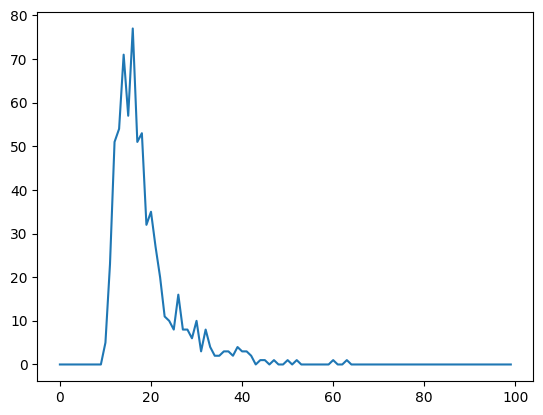

In [10]:
pd.Series(event_durations).plot()

<Axes: >

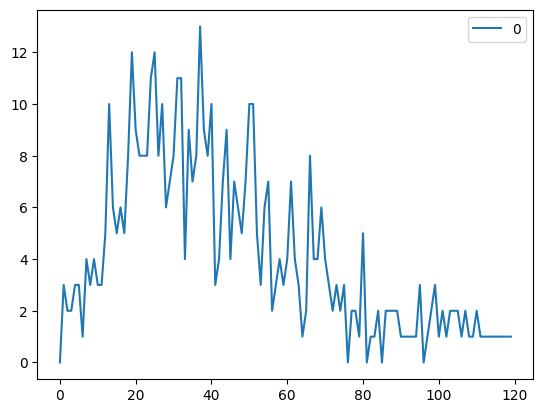

In [2]:
pd.read_csv('Notebooks/AHIs.csv').plot()

<Axes: >

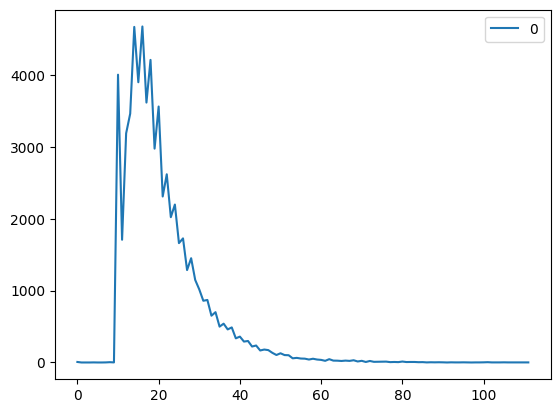

In [3]:
pd.read_csv('Notebooks/event_durations.csv').plot()